In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import random as rm
import mchmm as mc
import math

In [2]:
# file names
## training
### subject 1-30
train_subject_f = "UCI_HAR_Dataset/train/subject_train.txt"
### classification 
y_train_f = "UCI_HAR_Dataset/train/y_train.txt"

## testing
### subject 1-30
test_subject_f = "UCI_HAR_Dataset/test/subject_test.txt"
### classification 
y_test_f = "UCI_HAR_Dataset/test/y_test.txt"

In [3]:
# training data frames
train_subject_df = pd.read_csv(train_subject_f, sep=' ', header=None)
y_train_df = pd.read_csv(y_train_f, sep=' ', header=None, names=["State"])

# testing dataframes
test_subject_df = pd.read_csv(test_subject_f, sep=' ', header=None)
y_test_df = pd.read_csv(y_test_f, sep=' ', header=None, names=["State"])

In [4]:
# combine subject information with training/testing data frames
y_train_df.insert(0, "Subject", train_subject_df)
y_test_df.insert(0, "Subject", test_subject_df)

In [5]:
# combine testing and training data frames into one
all_data = pd.concat([y_train_df, y_test_df], axis=0)

In [6]:
## empty dataframe of predictions and original results
predictions = pd.DataFrame()
testing = pd.DataFrame()

In [7]:
## subjects 1-30
for i in range(1, len(all_data["Subject"].unique())+1):
    # get all entries for given subject
    all_data_i = all_data[all_data["Subject"] == i]
    # split first 80% training, last 20% testing/forecasting
    ## just kidding: we are taking last 50 observations as forecasting, rest is training
    #i_train = all_data_i[:(round(np.shape(all_data_i)[0]*.8))]
    #i_test = all_data_i[(round(np.shape(all_data_i)[0]*.8)):]
    i_train = all_data_i[:(np.shape(all_data_i)[0]-50)]
    i_test = all_data_i[(np.shape(all_data_i)[0]-50):]
    testing[str(i)] = i_test["State"].values
    # format training states into a string
    state_string = ""
    for x in i_train["State"]:
        state_string = state_string + str(x)
    # generate markov chain model
    a = mc.MarkovChain().from_data(state_string)
    # predict testing states
    ids, states = a.simulate(len(i_test["State"]), start=str(i_test.iloc[0,1]))
    ## save state predictions as column in new prediction dataframe???
    predictions[str(i)] = states

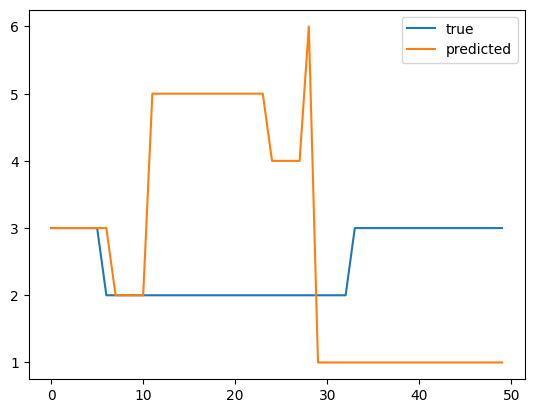

In [8]:
plt.plot(testing.index, testing["1"].astype('int'), label="true")
plt.plot(testing.index, predictions["1"].astype('int'), label="predicted") 
plt.legend()

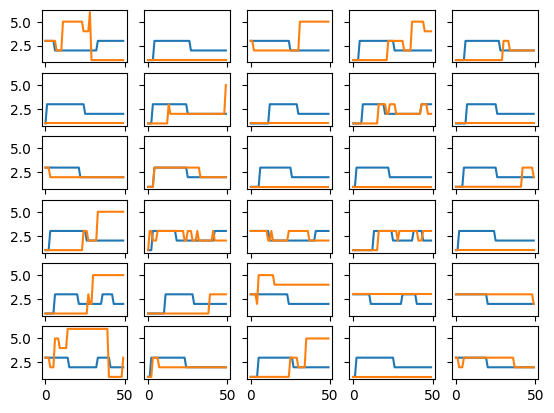

In [9]:
fig, axs = plt.subplots(6, 5, sharex=True, sharey=True)

subject = 1
for row in range(0,6):
    for col in range(0,5):
        #print('('+str(row)+','+str(col)+')')
        axs[row, col].plot(testing.index, testing[str(subject)].astype('int'), label="true")
        axs[row, col].plot(testing.index, predictions[str(subject)].astype('int'), label="predicted") 
        subject = subject + 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [13]:
## accuracy measurement: rmse of rounded values
rmse_results = pd.DataFrame()

for i in range(1,31):
    rmse_i = math.sqrt(((testing[str(i)].astype('int') - predictions[str(i)].astype('int'))**2).mean())
    rmse_results.at[i,"rmse"] = rmse_i

In [14]:
rmse_results

,rmse
1,2.107131
2,1.516575
3,1.969772
4,1.843909
5,1.371131
6,1.555635
7,1.095445
8,1.356466
9,0.979796
10,1.414214


In [15]:
rmse_results.mean()

rmse    1.367843
dtype: float64